In [126]:
import sklearn
sklearn.__version__

'1.3.1'

In [127]:
import pandas as pd   
from matplotlib import pyplot
from numpy import mean
import time


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

def missing_value_counts(dataframe):
    # Calculate the count of missing values in each column
    missing_counts = dataframe.isnull().sum()

    # Create a DataFrame to display the results
    missing_counts_df = pd.DataFrame({'Column': missing_counts.index, 'Missing_Values_Count': missing_counts.values})

    return missing_counts_df

In [128]:
df1 = pd.read_csv("train.csv")
df1.drop(['RecordID', 'hospital_id', ], axis=1, inplace=True)
death_counts = df1['hospital_death'].value_counts()
death_counts
df1.head()

,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,age,elective_surgery,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
0,1931,Caucasian,M,Floor,transfer,Med-Surg ICU,Metabolic,Metabolic,28.0,0,...,86,93.0,86.0,NaN,NaN,0.01,0.00,0,0,0
1,1544,African American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular,69.0,0,...,95,95.0,95.0,333.0,3.7,NaN,NaN,0,0,0
2,1517,Caucasian,M,Floor,admit,MICU,Respiratory,Respiratory,84.0,0,...,162,174.0,162.0,160.0,4.2,0.38,0.15,0,0,0
3,1811,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic,59.0,0,...,140,163.0,140.0,258.0,3.8,0.12,0.06,0,0,0
4,1845,Caucasian,F,Accident & Emergency,admit,CSICU,Cardiovascular,Cardiovascular,85.0,0,...,119,119.0,119.0,110.0,3.9,0.15,0.07,0,0,0


In [129]:


# missing_value_counts(df1)

In [130]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

def impute_dataframe(df):
    # Identify numerical and categorical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns

    # Perform mean imputation on numerical columns
    numerical_imputer = SimpleImputer(strategy='mean')
    df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

    # Impute categorical columns by adding a new category for NaN values
    df[categorical_columns] = df[categorical_columns].fillna('missing_category')

    # Min-Max scale numerical columns
    scaler = MinMaxScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df

impute_dataframe(df1)
missing_value_counts(df1)

,Column,Missing_Values_Count
0,icu_id,0
1,ethnicity,0
2,gender,0
3,icu_admit_source,0
4,icu_stay_type,0
5,icu_type,0
6,apache_3j_bodysystem,0
7,apache_2_bodysystem,0
8,age,0
9,elective_surgery,0


In [131]:
df_onehot = pd.get_dummies(df1)
print(df_onehot.dtypes)
print(df_onehot.shape)

icu_id                                     float64
age                                        float64
elective_surgery                           float64
pre_icu_los_days                           float64
apache_2_diagnosis                         float64
                                            ...   
apache_2_bodysystem_Respiratory               bool
apache_2_bodysystem_Trauma                    bool
apache_2_bodysystem_Undefined Diagnoses       bool
apache_2_bodysystem_Undefined diagnoses       bool
apache_2_bodysystem_missing_category          bool
Length: 99, dtype: object
(50000, 99)


In [132]:
X = df_onehot.loc[:, df_onehot.columns != "hospital_death"]
y = df_onehot[["hospital_death"]]

y.head()

,hospital_death
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [133]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, random_state=2)

In [134]:
testy.shape

(5000, 1)

In [135]:
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree model
dt_6_2 = DecisionTreeClassifier(max_depth=6, random_state=2, min_samples_leaf=10, min_samples_split=2)
dt_6_2.fit(trainX, trainy)

# Get feature importances
feature_importances = dt_6_2.feature_importances_

# Create a Pandas Series with feature importances and column names
feature_imp = pd.Series(feature_importances, index=trainX.columns).sort_values(ascending=False)

# Number of columns to remove
num_columns_to_remove = 40

# Get the column names of the lowest importance features
columns_to_remove = feature_imp.tail(num_columns_to_remove).index
print(columns_to_remove)

# Remove the columns from the dataframe
trainX_reduced = trainX.drop(columns=columns_to_remove)

# Print the reduced dataframe
print(trainX_reduced.head())


from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(trainX_reduced,trainy)
md_probs = gnb.predict_proba(testX.drop(columns=columns_to_remove))
print(testy.shape)
print(trainX_reduced.shape)
md_probs = md_probs[:,1]




Index(['apache_2_bodysystem_Renal/Genitourinary',
       'apache_3j_bodysystem_Hematological', 'apache_2_bodysystem_Respiratory',
       'apache_2_bodysystem_Trauma', 'apache_3j_bodysystem_Respiratory',
       'ethnicity_Asian', 'icu_admit_source_Other Hospital', 'd1_diasbp_min',
       'h1_mbp_min', 'h1_heartrate_min', 'h1_heartrate_max', 'h1_diasbp_min',
       'd1_heartrate_max', 'd1_diasbp_noninvasive_min', 'intubated_apache',
       'icu_admit_source_Operating Room / Recovery', 'gcs_verbal_apache',
       'gcs_unable_apache', 'apache_post_operative', 'apache_2_diagnosis',
       'pre_icu_los_days', 'elective_surgery', 'h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min', 'h1_spo2_max', 'h1_sysbp_noninvasive_min',
       'immunosuppression', 'solid_tumor_with_metastasis',
       'ethnicity_African American', 'ethnicity_Caucasian',
       'ethnicity_Hispanic', 'ethnicity_Native American',
       'ethnicity_Other/Unknown', 'ethnicity_missing_category', 'gender_F',
       'gender

/opt/homebrew/Caskroom/miniforge/base/envs/imlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
md_auc = roc_auc_score(testy, md_probs)
md_auc

0.8245840677305091

Categorical Naive Bayes  :  0.7969985005991924


/opt/homebrew/Caskroom/miniforge/base/envs/imlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


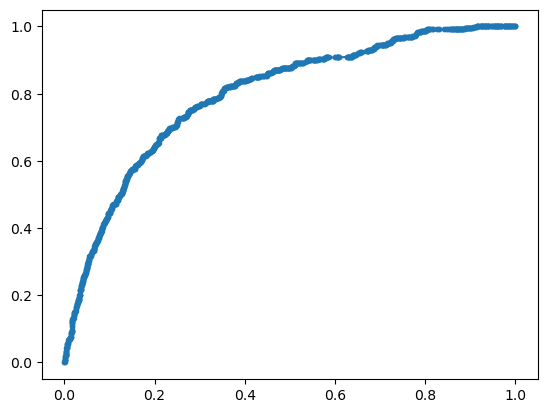

In [137]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)
    
cnb = CategoricalNB()
    
# fit_model(gnb, "Naive Bayes")
fit_model(cnb, "Categorical Naive Bayes")
    

In [138]:
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1)#, random_state=2)
# dt_5_2 = DecisionTreeClassifier(max_depth=5)  
# fit_model(dt_5_2, "Depth 5 Split 2") 

# dt_7_2 = DecisionTreeClassifier(max_depth=7)  
# fit_model(dt_7_2, "Depth 7 Split 2") 

# dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
# fit_model(dt_5_5, "Depth 5 Split 5") 

# dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
# fit_model(dt_7_5, "Depth 7 Split 5") 

# dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
# fit_model(dt_3_2, "Depth 3 Split 2") 

# dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
# fit_model(dt_3_5, "Depth 3 Split 5") 

# #kn = KNeighborsClassifier(n_neighbors=5)
# #fit_model(kn, "k-NN")

# #pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
# #fit_model(pipe_kn, "Scaled k-NN")

# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

In [139]:
def fitting_models_CV2(X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=2)
    
    # dt_5_2 = DecisionTreeClassifier(max_depth=5, )  
    # dt_7_2 = DecisionTreeClassifier(max_depth=7)  
    # dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
    # dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
    dt_7_3 = DecisionTreeClassifier(max_depth=7, min_samples_split=3)  
    clfs = [
            # ('Depth 5 Split 2', dt_5_2),        
            # ('Depth 7 Split 2', dt_7_2),        
            # ('Depth 5 Split 5', dt_5_5),
            # ('Depth 7 Split 5', dt_7_5),
            ('Depth 10 Split 2', dt_7_3)
            
           ]

    models = []
    for name, clf in clfs:
        clf.fit(X, y)  # Fit the model to your data
        models.append((name, clf))  # Store the trained model
        
        start = time.perf_counter()
        accuracy = cross_val_score(clf, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
        scores = cross_val_score(clf, X, y, scoring="roc_auc", cv=cv, n_jobs=-1) 
        end = time.perf_counter()        
        score = format(mean(scores), '.4f')
        duration = format((end-start), '.4f')
        accuracy = format(mean(accuracy), '.4f')
        
        print("{} : score:{} - time taken:{} - accuracy:{}".format(name, score, duration, accuracy))
    
    return models


In [140]:
models = fitting_models_CV2(X,y)


Depth 10 Split 2 : score:0.8431 - time taken:5.4848 - accuracy:0.9203


In [141]:
models
for name, model in models:
    print(type(model))
    model.predict_proba(testX)
    
    


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [142]:
import numpy as np

def generate_predictions(models, test_file):
    df_test = pd.read_csv(test_file)
    df_test_onehot = pd.get_dummies(df_test)
    X_test = df_test_onehot.loc[:, df_test_onehot.columns != "hospital_death"]
    record_ids = df_test["RecordID"]
    predictions = []
    for name, model in models:
        
        probs = model.predict_proba(X_test)
        probs = probs[:,1]
        predictions.append(probs)
    predictions = np.array(predictions)
    predictions = np.mean(predictions, axis=0)
    result = pd.DataFrame({'RecordID': record_ids, 'hospital_death': predictions})
    return result


results = generate_predictions(models, "test.csv")
results.to_csv("results.csv", index=False, header=["RecordID", "hospital_death"])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- RecordID
- hospital_id
Feature names seen at fit time, yet now missing:
- apache_2_bodysystem_missing_category
- apache_3j_bodysystem_missing_category
- ethnicity_missing_category
- gender_missing_category
- icu_admit_source_missing_category


In [ ]:
def generate_predictions_for_model(model, test_file, output_file):
    # Load the test data
    df_test = pd.read_csv(test_file)
    df_test_onehot = pd.get_dummies(df_test)
    df_test_onehot = impute_dataframe(df_test_onehot)
    df_test_onehot = df_test_onehot.drop(columns=columns_to_remove)
    
    X_test = df_test_onehot.loc[:, df_test_onehot.columns != "hospital_death"]
    record_ids = df_test["RecordID"]
    
    # Generate predictions using the model
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    
    # Create a DataFrame for the results
    result = pd.DataFrame({'RecordID': record_ids, 'hospital_death': probs})
    
    # Save the results to a CSV file
    result.to_csv(output_file, index=False, header=["RecordID", "hospital_death"])
    



In [143]:
generate_predictions_for_model(gnb, "test.csv", "results8.csv")

KeyError: "['ethnicity_missing_category', 'gender_missing_category', 'apache_2_bodysystem_missing_category'] not found in axis"